<a href="https://colab.research.google.com/github/Gustavo-Ros/Simulacion-1/blob/main/Prueba_chi_cuadrada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRUEBA DE BONDAD CHI-CUADRADA

Con esta prueba se quiere verificar que no hay diferencia detectable entre la distribución muestral y la teórica. Por lo tanto, se plantea la hipóstesis nula:

> $H_0:$ Los números de la muestra proviene de una distribución uniforme en el
 intervalo $(a,b)$, a un nivel de significancia $\alpha=0.05$

 En este caso, distribución uniforme:
 * Funciona solo para 5 o más clases

 * Para cantidades grandes de datos $\chi^2 ≈N(\mu, \sigma)$

#EJERCICIO
Determine si la siguiente lista de 100 números de 2 dígitos tiene una distribución uniforme con un nivel de aceptación de 90 %.
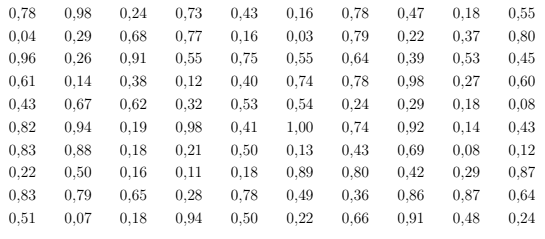

#CÓDIGO

In [ ]:
import numpy as np
import pandas as pd
from tabulate import tabulate

lista=[0.78, 0.98, 0.24, 0.73, 0.43, 0.16, 0.78, 0.47, 0.18, 0.55, 0.04, 0.29, 0.68, 0.77, 0.16, 0.03, 0.79, 0.22, 0.37, 0.80, 0.96, 0.26, 0.91, 0.55, 0.75, 0.55, 0.64, 0.39, 0.53, 0.45, 0.61, 0.14, 0.38, 0.12, 0.40, 0.74, 0.78, 0.98, 0.27, 0.60, 0.43, 0.67, 0.62, 0.32, 0.53, 0.54, 0.24, 0.29, 0.18, 0.08, 0.82, 0.94, 0.19, 0.98, 0.41, 1.00, 0.74, 0.92, 0.14, 0.43, 0.83, 0.88, 0.18, 0.21, 0.50, 0.13, 0.43, 0.69, 0.08, 0.12, 0.22, 0.50, 0.16, 0.11, 0.18, 0.89, 0.80, 0.42, 0.29, 0.87, 0.83, 0.79, 0.65, 0.28, 0.78, 0.49, 0.36, 0.86, 0.87, 0.64, 0.51, 0.07, 0.18, 0.94, 0.50, 0.22, 0.66, 0.91, 0.48, 0.24]
intervalos = np.linspace(0,1,6) #DIVIDE [0,1] EN 5 INTERVALOS

conteo=np.histogram(lista, bins=intervalos)[0] #REALIZA CONTEO EN INTERVALOS

#DATOSD DE DATA FRAME
fe = 20
dif = []
chi = []
df = []

#CALCULOS
dif = np.concatenate([conteo - fe]) #f0-fe
chi = np.concatenate([(conteo-fe)**2/fe]) #(f0-fe)**2/fe
suma_chi=sum(chi) #ESTADISTICO CALCULADO
suma_frec=sum(conteo) #FRECUENCIA TOTAL

#LLENA DATA FRAME CON CALCULOS
data = pd.DataFrame({'Intervalos': ["(0.1-0.20]","(0.21-.40]","(0.41-0.60]","(0.61-0.80]","(0.81-1.0]"],'f0':conteo ,'fe':fe, 'f0-fe':dif, '(f0-fe)^2/fe':chi})
data.loc['Suma total']=['Suma  total',suma_frec,'','',suma_chi]
print(tabulate(data, headers='keys', tablefmt='fancy_grid', floatfmt=".2f", showindex=False)) #IMPRIME TABLA

#AJUSTE DE BONDAD
from scipy.stats import chi2
alpha = 0.1
gl = 4
P_critico = chi2.ppf(1 - alpha, gl)
print(f"Valor crítico: {P_critico}")
print(f"Estadístico calculado: {suma_chi}")

# PRUEBA DE HIPOTESIS
if suma_chi > P_critico:
    print("Se RECHAZA la hipótesis nula")
else:
    print(f"Se ACEPTA la hipótesis nula: Los números tienen una distribución uniforme a un nivel de significancia del {alpha}")



╒══════════════╤══════╤══════╤═════════╤════════════════╕
│ Intervalos   │   f0 │ fe   │ f0-fe   │   (f0-fe)^2/fe │
╞══════════════╪══════╪══════╪═════════╪════════════════╡
│ (0.1-0.20]   │   20 │ 20   │ 0       │           0.00 │
├──────────────┼──────┼──────┼─────────┼────────────────┤
│ (0.21-.40]   │   18 │ 20   │ -2      │           0.20 │
├──────────────┼──────┼──────┼─────────┼────────────────┤
│ (0.41-0.60]  │   22 │ 20   │ 2       │           0.20 │
├──────────────┼──────┼──────┼─────────┼────────────────┤
│ (0.61-0.80]  │   20 │ 20   │ 0       │           0.00 │
├──────────────┼──────┼──────┼─────────┼────────────────┤
│ (0.81-1.0]   │   20 │ 20   │ 0       │           0.00 │
├──────────────┼──────┼──────┼─────────┼────────────────┤
│ Suma  total  │  100 │      │         │           0.40 │
╘══════════════╧══════╧══════╧═════════╧════════════════╛
Valor crítico: 7.779440339734858
Estadístico calculado: 0.4
Se ACEPTA la hipótesis nula: Los números tienen una distribución unifo